# Libraries

In [ ]:
#!conda install -y -c conda-forge selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

## Crawling Alibaba

In [414]:
driver = webdriver.Chrome()
driver.get('https://www.alibaba.ir/iranout')
driver.maximize_window()


origin_city = 'Tehran'
destination_city = 'Istanbul'

foreign_flights_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.mb-6.text-center > ul > li.is-active > a'
which_way_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.items-stretch.justify-start.mb-5 > span:nth-child(1) > button'
one_way_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.items-stretch.justify-start.mb-5 > span:nth-child(1) > div > div > ul > li:nth-child(1) > a'
origin_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.a-input-group.is-horizontal.relative.mb-0 > div.a-input.is-first.is-lg > span > input'
origin_dropdown_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.v-dropdown.pretty-scroll.is-open > div > ul > li:nth-child(1) > a'
destination_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.a-input-group.is-horizontal.relative.mb-0 > div.a-input.is-last.is-lg > span > input'
destination_dropdown_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.v-dropdown.pretty-scroll.is-open > div > ul > li:nth-child(1) > a'
date_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div.relative > div > div.v-dropdown.pretty-scroll.is-open > div > div.a-card__body.relative > div > div > div.datepicker-slide.lg\:-mx-2 > div:nth-child(1) > div > span:nth-child(33)'
date_btn_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div.relative > div > div.v-dropdown.pretty-scroll.is-open > div > div.a-card__footer.flex.justify-between.items-center.py-2 > button'

search_btn_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(4) > button'
loading_screen_css = 'div.loading-banner'

available_flights_css = '#app > div.wrapper > main > div > div > section > div:nth-child(4) > div'

airline_class = 'airline-name'
departure_css = 'div.available-card__details > div > div.flex > div.available-card-route > div > div:nth-child(1)'
arrival_css = 'div.available-card__details > div > div.flex > div.available-card-route > div > div:nth-child(3)'
price_class = 'text-secondary-400'
flight_duration_css = 'div.available-card__details > div.flex.flex-1.items-center.mb-2 > div.available-card-route.flex-grow > div.flex.w-full.items-center > span > span.stops__label'
flight_number_css = 'div.available-card__details > div.-mx-4.mt-1 > div > div > div > div > div:nth-child(1) > div.flex.w-full.mt-4 > div > div.mt-3 > span:nth-child(1) > span'


waits = WebDriverWait(driver, 10)
search_waits = WebDriverWait(driver, 100)


# Fill the form
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, foreign_flights_css))).click()
time.sleep(1)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, which_way_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, one_way_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, origin_css))).send_keys(origin_city)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, origin_dropdown_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, destination_css))).send_keys(destination_city)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, destination_dropdown_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, date_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, date_btn_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, search_btn_css))).click()


# Wait until the search has finished
search_waits.until(EC.visibility_of_element_located((By.CSS_SELECTOR, loading_screen_css)))
search_waits.until(EC.invisibility_of_element((By.CSS_SELECTOR, loading_screen_css)))


# Scroll down to fetch all data
speed = 50
current_scroll_position, new_height = 0, 1
while current_scroll_position < new_height:
    time.sleep(0.1)
    current_scroll_position += speed
    # JavaScript code to scroll to a position
    driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
    # Javascript code to return page height
    new_height = driver.execute_script("return document.body.scrollHeight")



# Loop over flights
flights = driver.find_elements_by_css_selector(available_flights_css)

airlines = []
departures = []
arrivals = []
prices = []
durations = []
flight_numbers = []

for flight in flights:
    
    # Initial info
    time.sleep(0.5)
    airlines.append(flight.find_element_by_class_name(airline_class).text)
    departures.append(flight.find_element_by_css_selector(departure_css).text)
    arrivals.append(flight.find_element_by_css_selector(arrival_css).text)
    prices.append(flight.find_element_by_class_name(price_class).text)

    # Click to see more details
    flight.click()
    time.sleep(1)
    durations.append(waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, flight_duration_css))).text)
    flight_numbers.append(waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, flight_number_css))).text)

    # Click away from the popup window
    webdriver.ActionChains(driver).move_by_offset(0, 0).double_click().perform()
        
driver.close()


# Write data to CSV
product = {'Airline': airlines, 
           'Departure': departures, 
           'Arrival': arrivals, 
           'Price': prices, 
           'Duration': durations, 
           'Flight_num': flight_numbers}

data = pd.DataFrame.from_dict(product, orient='index')
data = data.transpose()
data.to_csv('alibaba_flights.csv', index=False)
data.head()

,Airline,Departure,Arrival,Price,Duration,Flight_num
0,Qeshm Air,18:45\nتهران (IKA),21:15\nاستانبول (IST),"31,000,000",3 ساعت,QB2215
1,Mahan Airlines,17:10\nتهران (IKA),19:55\nاستانبول (IST),"31,000,000",3 ساعت و 15 دقیقه,114
2,IRAN AIRTOUR,19:35\nتهران (IKA),22:30\nاستانبول (IST),"31,000,000",3 ساعت و 25 دقیقه,9702
3,IranAir,08:05\nتهران (IKA),11:05\nاستانبول (IST),"31,440,000",3 ساعت و 30 دقیقه,IR719
4,AnadoluJet,05:20\nتهران (IKA),07:55\nاستانبول (SAW),"33,280,000",3 ساعت و 5 دقیقه,7689


<hr />

In [415]:
df = pd.read_csv('alibaba_flights.csv')
df

,Airline,Departure,Arrival,Price,Duration,Flight_num
0,Qeshm Air,18:45\nتهران (IKA),21:15\nاستانبول (IST),"31,000,000",3 ساعت,QB2215
1,Mahan Airlines,17:10\nتهران (IKA),19:55\nاستانبول (IST),"31,000,000",3 ساعت و 15 دقیقه,114
2,IRAN AIRTOUR,19:35\nتهران (IKA),22:30\nاستانبول (IST),"31,000,000",3 ساعت و 25 دقیقه,9702
3,IranAir,08:05\nتهران (IKA),11:05\nاستانبول (IST),"31,440,000",3 ساعت و 30 دقیقه,IR719
4,AnadoluJet,05:20\nتهران (IKA),07:55\nاستانبول (SAW),"33,280,000",3 ساعت و 5 دقیقه,7689
5,Pegasus,04:15\nتهران (IKA),07:05\nاستانبول (SAW),"33,500,000",3 ساعت و 20 دقیقه,PC513
6,IranAir,08:05\nتهران (IKA),10:35\nاستانبول (IST),"34,000,000",3 ساعت,719
7,Mahan Airlines,09:00\nتهران (IKA),11:45\nاستانبول (IST),"34,000,000",3 ساعت و 15 دقیقه,116
8,IRAN AIRTOUR,19:35\nتهران (IKA),22:30\nاستانبول (IST),"34,000,000",3 ساعت و 25 دقیقه,9702
9,Turkish Airlines,06:30\nتهران (IKA),09:20\nاستانبول (IST),"34,747,900",3 ساعت و 20 دقیقه,873


<hr />


## Crawling Mrbilit


In [416]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
from pynput import keyboard
import pandas as pd


origin_city = 'تهران'
destination_city = 'استانبول'
choose_forigen_flight = '#form-plane > div.mode-container.transform-in-mobile-size > div > div:nth-child(2) > div.mode-radio-label'
click_one_way = '#selected-list'
select_one_way = '#form-plane > div.list-container.box-container.active.transform-in-mobile-size > div.mode-items-container.mode-list > div.mode-list-item.mode-selected.mode-right > span'
click_origin_box = 'input[aria-label="Search for option"]'
click_to_date = '#form-plane > div.search-form-rows > div.row.date-row > div > div.datepicker-wrapper > div.datepicker-container > div.datepicker-body > div > div:nth-child(2) > div.month-days-container > div:nth-child(26) > div > div'
click_to_date_confirm = '#form-plane > div.search-form-rows > div.row.date-row > div > div.datepicker-wrapper > div.datepicker-container > div.datepicker-actions > button.mr-button.datepicker-btn.lg.filled'
click_to_search_button = '#checkbox-row > button'
click_origin_box = '#form-plane > div.search-form-rows > div.row.org-dest > div.city-container.city-container-origin > div > div > div > div.v-select.form-control.from.isSelectpicker.select-mobile-fullscreen.vs--single.vs--searchable > div.vs__dropdown-toggle > div.vs__selected-options > input'
click_dest_box = '#form-plane > div.search-form-rows > div.row.org-dest > div.city-container.city-container-destination > div > div > div > div.v-select.form-control.from.isSelectpicker.select-mobile-fullscreen.vs--single.vs--searchable > div.vs__dropdown-toggle > div.vs__selected-options > input'
click_dest_box = '#form-plane > div.search-form-rows > div.row.org-dest > div.city-container.city-container-destination > div > div > div > div.v-select.form-control.from.isSelectpicker.select-mobile-fullscreen.vs--single.vs--searchable > div.vs__dropdown-toggle > div.vs__selected-options > input'
loading_screen_css = '#modals-container > div > div > div.v--modal-box.loading-modal > div > div > div > img.desktop-only'
departure_css = 'div[class="departure-time"]'
arrival_css =  'div[class="arrival-time"]'
airline_css = 'div[class="logo-text"]'
duration_css = 'div[class="trip-route-arrow-stops"]'
price_css = 'div.buy-payable > span.buy-payable-price'
click_for_more_detail = 'div[class="more-details"]'
flight_number_css = 'div.lc-flight-number > span.logo-text'

airlines = []
departures = []
arrivals = []
prices = []
durations = []
flight_numbers = []



driver = webdriver.Chrome()
url = 'https://mrbilit.com/'
driver.get(url)
driver.maximize_window()

waits = WebDriverWait(driver , 10)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, choose_forigen_flight))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_one_way))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, select_one_way))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_origin_box))).send_keys(origin_city)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_origin_box))).send_keys(Keys.ARROW_DOWN)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_origin_box))).send_keys(Keys.ENTER)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_dest_box))).send_keys(destination_city)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_dest_box))).send_keys(Keys.ARROW_DOWN)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_dest_box))).send_keys(Keys.ENTER)
time.sleep(3)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_to_date))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_to_date_confirm))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, click_to_search_button))).click()
time.sleep(5)

search_waits = WebDriverWait(driver , 100)

# Wait until the search has finished
search_waits.until(EC.visibility_of_element_located((By.CSS_SELECTOR, loading_screen_css)))
search_waits.until(EC.invisibility_of_element((By.CSS_SELECTOR, loading_screen_css)))


flights = driver.find_elements_by_css_selector('div[class="card-wrapper"]')

# Scroll Down to end 
speed = 100
current_scroll_position, new_height = 0, 1
while current_scroll_position < new_height:
    time.sleep(0.1)
    current_scroll_position += speed
    # JavaScript code to scroll to a position
    driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
    # Javascript code to return page height
    new_height = driver.execute_script("return document.body.scrollHeight")


time.sleep(6)
for flight in flights:
    
    departures.append(flight.find_element_by_css_selector(departure_css).text)
    arrivals.append(flight.find_element_by_css_selector(arrival_css).text)
    airlines.append(flight.find_element_by_css_selector(airline_css).text)
    durations.append(flight.find_element_by_css_selector(duration_css).text)
    prices.append(flight.find_element_by_css_selector(price_css).text)
    time.sleep(0.1)
    flight.find_element_by_css_selector(click_for_more_detail).click()
    flight_numbers.append(flight.find_element_by_css_selector(flight_number_css).text)
    time.sleep(0.1)
    
 
driver.close()

# Write data to CSV
product = {'Airline': airlines, 
           'Departure': departures, 
           'Arrival': arrivals, 
           'Price': prices, 
           'Duration': durations, 
           'Flight_num': flight_numbers}

data = pd.DataFrame.from_dict(product, orient='index')
data = data.transpose()
data.to_csv('alibaba_flights.csv', index=False)
data.head()  


,Airline,Departure,Arrival,Price,Duration,Flight_num
0,قشم ایر,18:45,21:15,"30,732,000",2 ساعت و 30 دقیقه,قشم ایر QB2215
1,قشم ایر,18:45,21:15,"31,000,000",2 ساعت و 30 دقیقه,قشم ایر 2215
2,ایران ایرتور,19:35,22:30,"31,000,000",2 ساعت و 55 دقیقه,ایران ایرتور 9702
3,ماهان,17:10,19:50,"31,377,000",2 ساعت و 40 دقیقه,ماهان 114
4,ایران ایر,08:05,11:05,"31,440,000",3 ساعت,ایران ایر 719


<hr />




### use Regex for MrBilit : edit Flight Number column

In [417]:
def Flight_NO(x):
    y = re.findall('([\w]*?\d+)',x)
    return y[0]

data['Flight_num'] = data['Flight_num'].apply(Flight_NO)

### Use Regex for Alibaba : edit Departure and Arrival time

In [418]:
def Departure_and_Arrival_time(x):
    y = re.findall('^(.*)\\n',x)
    return y[0]
df['Departure'] = df['Departure'].apply(Departure_and_Arrival_time)
df['Arrival'] = df['Arrival'].apply(Departure_and_Arrival_time)


### Equaling Airline column

In [419]:
def AirLine_Cloumn_Equaling(x):
    if x == 'ماهان' or x == 'Mahan':
        return 'Mahan Airlines'
    if x == 'قشم ایر':
        return 'Qeshm Air'
    if x == 'ایران ایرتور':
        return 'IRAN AIRTOUR'
    if x == 'ترکیش ایرلاینز':
        return 'Turkish Airlines'
    
    if x == 'پگاسوس ایرلاینز':
        return 'Pegasus'
    
    if x == 'لوفتهانزا':
        return 'Lufthansa '
    
    if x == 'ایران ایر':
        return 'IranAir'
    
    if x == 'معراج':
        return 'Meraj Airlines'
    
    if x == 'فلای دوبی\u200c':
        return 'Flydubai'
    
    if x == 'هواپیمایی امارات':
        return 'Emirates'
    
    if x == 'قطر ایرویز':
        return 'Qatar Airways'
    
    if x == 'سویس اینترنشنال ایر لینس':
        return 'Swiss International Air Lines'
    
    if x == 'قطر ایرویز':
        return 'Qatar Airways'
    else:
        return x
    
data['Airline'] = data['Airline'].apply(AirLine_Cloumn_Equaling)
df['Airline'] = df['Airline'].apply(AirLine_Cloumn_Equaling)

### Joining Table
#### علی بابا مدت زمان سفر رو اشتباه اعلام میکنه!چون اختلاف ساعت حرکت و رسیدن باید باشه طبیعتا. ولی مستربلیت درست میگه. به هر حال من هر دو مدت رو آوردم بازم

In [459]:
on_merge = ['Airline','Departure','Arrival' , 'Flight_num']
final_df = df.merge(data,how = 'outer',on = on_merge , suffixes=('_Alibaba' , '_MrBilit'))
final_df.head()

,Airline,Departure,Arrival,Price_Alibaba,Duration_Alibaba,Flight_num,Price_MrBilit,Duration_MrBilit
0,Qeshm Air,18:45,21:15,"31,000,000",3 ساعت,QB2215,"30,732,000",2 ساعت و 30 دقیقه
1,Mahan Airlines,17:10,19:55,"31,000,000",3 ساعت و 15 دقیقه,114,NaN,NaN
2,IRAN AIRTOUR,19:35,22:30,"31,000,000",3 ساعت و 25 دقیقه,9702,"31,000,000",2 ساعت و 55 دقیقه
3,IRAN AIRTOUR,19:35,22:30,"34,000,000",3 ساعت و 25 دقیقه,9702,"31,000,000",2 ساعت و 55 دقیقه
4,IranAir,08:05,11:05,"31,440,000",3 ساعت و 30 دقیقه,IR719,NaN,NaN


#### ReOrder Columns

In [460]:
columns_order = ['Airline','Departure','Arrival' , 'Duration_MrBilit','Duration_Alibaba','Price_MrBilit','Price_Alibaba','Flight_num']
final_df = final_df[columns_order]
final_df.head()

,Airline,Departure,Arrival,Duration_MrBilit,Duration_Alibaba,Price_MrBilit,Price_Alibaba,Flight_num
0,Qeshm Air,18:45,21:15,2 ساعت و 30 دقیقه,3 ساعت,"30,732,000","31,000,000",QB2215
1,Mahan Airlines,17:10,19:55,NaN,3 ساعت و 15 دقیقه,NaN,"31,000,000",114
2,IRAN AIRTOUR,19:35,22:30,2 ساعت و 55 دقیقه,3 ساعت و 25 دقیقه,"31,000,000","31,000,000",9702
3,IRAN AIRTOUR,19:35,22:30,2 ساعت و 55 دقیقه,3 ساعت و 25 دقیقه,"31,000,000","34,000,000",9702
4,IranAir,08:05,11:05,NaN,3 ساعت و 30 دقیقه,NaN,"31,440,000",IR719


<hr />

#### now we show and compare the prices of the tickets that exist on both websites

In [461]:
on_merge = ['Airline','Departure','Arrival' , 'Flight_num']
columns_order = ['Airline','Departure','Arrival' , 'Duration_MrBilit','Duration_Alibaba','Price_MrBilit','Price_Alibaba','Flight_num']
final_df = df.merge(data,how = 'inner',on = on_merge , suffixes=('_Alibaba' , '_MrBilit'))
final_df = final_df[columns_order]
final_df.head()

,Airline,Departure,Arrival,Duration_MrBilit,Duration_Alibaba,Price_MrBilit,Price_Alibaba,Flight_num
0,Qeshm Air,18:45,21:15,2 ساعت و 30 دقیقه,3 ساعت,"30,732,000","31,000,000",QB2215
1,IRAN AIRTOUR,19:35,22:30,2 ساعت و 55 دقیقه,3 ساعت و 25 دقیقه,"31,000,000","31,000,000",9702
2,IRAN AIRTOUR,19:35,22:30,2 ساعت و 55 دقیقه,3 ساعت و 25 دقیقه,"31,000,000","34,000,000",9702
3,Pegasus,04:15,07:05,2 ساعت و 50 دقیقه,3 ساعت و 20 دقیقه,"33,202,000","33,500,000",PC513
4,Pegasus,04:15,07:05,2 ساعت و 50 دقیقه,3 ساعت و 20 دقیقه,"33,202,000","44,160,168",PC513


#### با یک نگاه، طبق نمودار زیر به نظر می رسد که پروازهای سایت مستربلیت در بیشتر موارد اندکی گران تر از سایت علی بابا است
#### البته طبق نمودار زیر یک پرواز در مستربلیت تفاوت قیمتی زیادی با سایت علی بابا دارد. با توجه به بررسی که انجام دادم این پرواز در سایت مستربلیت به صورت بیزینس کلاس معرفی شده ولی همین پرواز در سایت علی بابا به صورت سیستمی تعریف شده است 

#### Convert Price to int For getting Average and ...

In [462]:
def Convert_prices_to_int(x):
    x = x.replace(',','')
    return int(x)

final_df['Price_Alibaba'] = final_df['Price_Alibaba'].apply(Convert_prices_to_int)
final_df['Price_MrBilit'] = final_df['Price_MrBilit'].apply(Convert_prices_to_int)


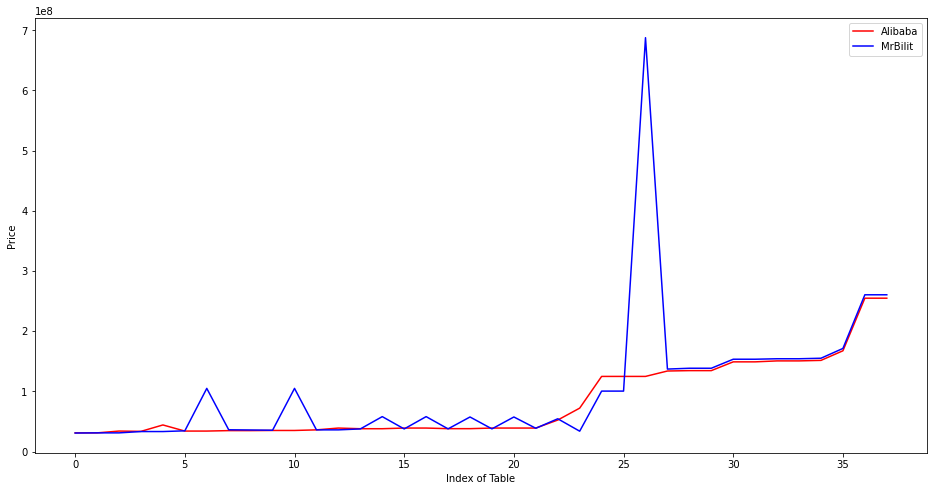

In [463]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(final_df['Price_Alibaba'] ,label='Alibaba' , color='r')
plt.plot(final_df['Price_MrBilit'] , label='MrBilit' , color='b')
plt.xlabel('Index of Table')
plt.ylabel('Price')
plt.legend()

<hr />

- Using <b>Matplotlib</b>, plot a bar chart, showing the average prices of both websites in each hour of departure. X-Axis should be the hours of the day (0 to 24). Y-Axis should be price.

###  به نظر می رسد پروازهای صبح (6 صبح تا 12 ظهر) به نسبت ارزان تر از پرواز های بعدازظهر و شب می باشد

#### Fetch hour from Departure Time

In [464]:
def Fetch_ONLY_hour_from_Departure(x):
    y = re.findall('^(.*):',x)
    return int(y[0])

table_with_hour_departure = final_df
table_with_hour_departure['Departure'] = table_with_hour_departure['Departure'].apply(Fetch_ONLY_hour_from_Departure)
groupby_table_with_hour_departure = table_with_hour_departure.groupby(by='Departure').mean()

#### Bar Plot

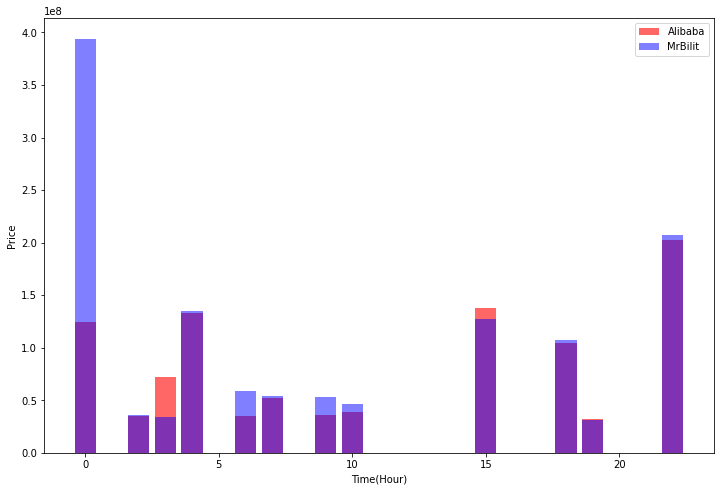

In [465]:
plt.figure(figsize=(12,8))
plt.bar(groupby_table_with_hour_departure.index , groupby_table_with_hour_departure['Price_Alibaba'] , color = 'red' ,alpha=0.6 , label = 'Alibaba')
plt.bar(groupby_table_with_hour_departure.index , groupby_table_with_hour_departure['Price_MrBilit'] , color = 'blue' , alpha=0.5 , label = 'MrBilit')
plt.xlabel('Time(Hour)')
plt.ylabel('Price')
plt.legend()

### According to the figure above, in most cases for Tehran to Istanbul flight (In that specific date) , Alibaba Flights are **cheaper** than MrBilit